<a href="https://colab.research.google.com/github/sswonlee/sswonlee/blob/main/%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_%EC%98%81%EC%96%B4_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-17\"

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [4]:
f=open('/content/metaverse youtube crawling.txt','r',encoding='utf-8')
txt = f.readlines()
f.close()

In [5]:
txt2 = []#중복 댓글 제거
for sentence in txt:
  if sentence not in txt2:
    txt2.append(sentence)
print(txt2)

["I can't tell you how excited I am for this. While the rest of the world is in the metaverse, I can go physically visit Yellowstone National Park and not be gridlocked with traffic since everyone else will be in the metaverse LOL\n", 'YES!! This comment right here is truth!\n', 'You are absolutely spot-on correct. I\'m so excited!  This "metaverse" will draw in masses and free up reality for what\'s left of sane people.\n', 'Lol\n', "Yeah I'm not going in there. It's a trap. Trust me.\n", '\xa0@Papa Fluoride\xa0 why do I want this, and don’t want this?\n', "\xa0@DatCake\xa0 What have you smoked?  I'm guessing either 2C-B or 5-MeO-DMT based on what you're saying.\n", '\xa0@1122redbird\xa0 wdym  how is that go against anything\n', 'meanwhile were gonna all be on an extreme permanent dopamine rush seeing whatever crazy view we can imagine\n', 'You will have Zero interest in Yellowstone after you experience The Matrix\n', "I just can't wrap my head around this - the only thing that's real

In [6]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
#영어번역을 위한 라이브러리
import nltk
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from tqdm import tqdm

for i, document in tqdm(enumerate(txt2)):
    clean_words = []
    for word in pos_tag(word_tokenize(document)): #어간 추출
        #if word[1] in ['Noun','Verb','Adjective']:
        if word[1] in ['NN']:
            clean_words.append(word[0])
    #print(clean_words) 
    txt2[i] = clean_words
print(txt2)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


1108it [00:03, 348.07it/s]

[['rest', 'world', 'metaverse', 'traffic', 'everyone', 'metaverse'], ['comment', 'truth'], ['correct', 'metaverse', 'reality', 'sane'], ['Lol'], ['Yeah', 'trap'], ['t'], [], ['anything'], ['dopamine', 'rush', 'view'], ['interest'], ['head', 'thing', 'metaverse', 'money'], ['money', 'cute', 'unreal'], ['spin', 'bridge'], ['@', 'rest', 'life', 'vr', 'headset', 'everytime', 'life', 'lonley', 'life'], ['t', 'money', 'character', 'shark', 'return.Same', 'game', 'school', 'Xbox'], ['@'], ['nothing'], ['sense', 'definition', 'value', 'thing', 'one', 'nothing', 'potential', 'everyone', 'worth', 'money', 'property', 'while'], ['online', 'community', 'version', 'fortnite', 'method', 'time', 'home', 'representation', 'place', 'place', 'metaverse', 'metaverse', 'life', 'world', 'example', 'house', 'furniture', 'metaverse', 'property', 'thru', 'upland', 'furniture', 'version', 'california', 'asset'], ['matrix', 'world', 'point', 'world', 'oculus', 'matrix'], ['right'], ['matrix'], ['nothing'], ['Te

In [8]:
#불용어 제거(영어)
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
unique_Noun_words=[]
for i in tqdm(range(len(txt2))):#이차원 배열 전체에서 for 문 돌리기
  tmp=[]
  for j in range(len(txt2[i])):#배열 안에서 일차원 배열의 길이가 서로 다 다르니깐 그 길이만큼 돌리면서
    if txt2[i][j] not in stop_words:#불용어 있는지 검사 없으면 tmp에 임시저장
      tmp.append(txt2[i][j])
  unique_Noun_words.append(tmp)#tmp에 임시저장한 리스트를 배열 전체 하나가 끝날때마다 검사
##각 댓글마다 하나의 list 안에 들어가 있던 것들을 합침 
# print(unique_Noun_words)
allunique_Noun_words = []
for i in unique_Noun_words:
  allunique_Noun_words.extend(i)
# print(allunique_Noun_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


100%|██████████| 1108/1108 [00:00<00:00, 67555.66it/s]


In [9]:
count = Counter(allunique_Noun_words)

words = (dict(count.most_common()))
print(words)

from itertools import islice
words_top50 = dict(islice(words.items(), 50)) #상위 50개 추출 (TFIDF와 네트워크구조 결과에 따라서 몇개로 할지 추후에 정할 예정)
print(words_top50)

{'world': 179, 'metaverse': 78, 'money': 61, 'life': 60, 'time': 45, 'game': 44, 'thing': 32, 'way': 31, 'reality': 30, '@': 30, 'future': 30, 'internet': 28, 'someone': 28, 'everyone': 23, 'video': 20, 'anything': 19, 'matrix': 18, 'movie': 18, 'technology': 17, 'everything': 17, 'company': 17, 'value': 16, 'property': 16, 'day': 16, 'meta': 16, 'anyone': 16, 'idea': 16, 'land': 16, 'lol': 15, 'something': 15, 'version': 14, 'work': 14, 'nothing': 13, 'point': 13, 'part': 13, 'lot': 13, 'player': 13, 'space': 13, 'blockchain': 13, 'one': 12, 'stuff': 12, 'market': 12, 'right': 11, 'crypto': 11, 'comment': 10, 'home': 10, 'profit': 10, 'currency': 10, 'generation': 10, 'online': 9, 'humanity': 9, 'scam': 9, 'house': 8, 'estate': 8, 'self': 8, 'interaction': 8, 'business': 8, 'experience': 8, 'computer': 8, 'price': 8, 'end': 8, 'name': 8, 'use': 8, 'word': 8, 'vr': 7, 'fortnite': 7, 'system': 7, 'verse': 7, 'health': 7, 'level': 7, 'avatar': 7, 'year': 7, 'today': 7, 'body': 7, 'living

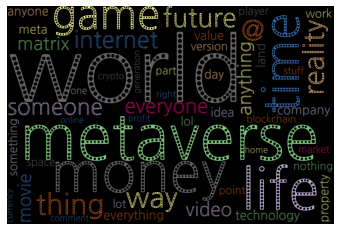

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

!apt-get update -qq
!apt-get install fonts-nanum* -qq

font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wordcloud = WordCloud(font_path = font, background_color='black',colormap = "Accent_r", 
                      width=3000, height=2000).generate_from_frequencies(words_top50) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()